In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
books = pd.read_csv(r"D:\ExcelR Project\Dataset\Books.csv")
users = pd.read_csv(r"D:\ExcelR Project\Dataset\Users.csv")
ratings = pd.read_csv(r"D:\ExcelR Project\Dataset\Ratings.csv")

In [3]:
# dimension of dataset
print(f'''\t  books shape is {books.shape}
          ratings shape is {ratings.shape}
          users shape is {users.shape}''')

	  books shape is (271360, 8)
          ratings shape is (1149780, 3)
          users shape is (278858, 3)


In [4]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication','Publisher','Image-URL-L']]
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [5]:
books.rename(columns={
    'Book-Title': 'title',
    'Book-Author': 'author',
    'Year-Of-Publication': 'year',
    'Publisher': 'publisher',
    'Image-URL-L': 'img_url'
},
             inplace=True)

In [6]:
books.head(2)

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [7]:
ratings.rename(columns={
    'User-ID' : 'user_id',
    'Book-Rating' : 'rating',
    
}, inplace=True)

In [8]:
books.isnull().sum()

ISBN         0
title        0
author       1
year         0
publisher    2
img_url      3
dtype: int64

In [9]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
ratings.isnull().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

In [11]:
books.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

In [13]:
users.duplicated().sum()

0

### Users_Dataset

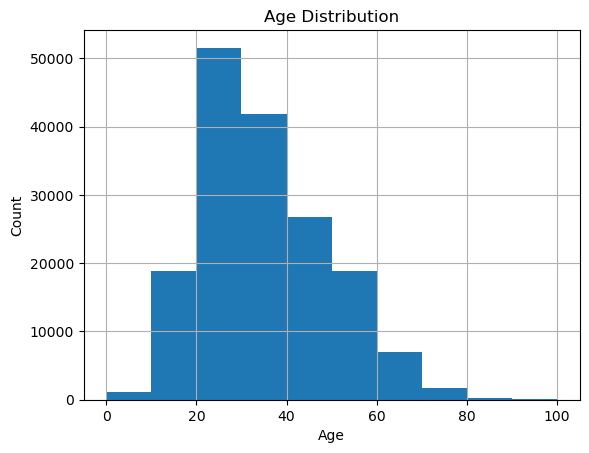

In [14]:
plt.hist(users['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()

Text(0.5, 1.0, 'outliers in Age Column')

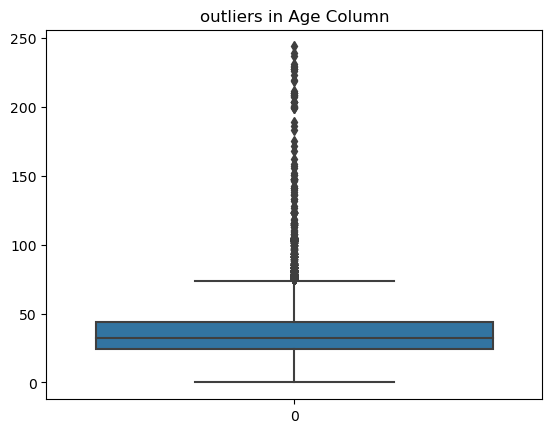

In [15]:
sns.boxplot(data=users['Age'])
plt.title('outliers in Age Column')

In [16]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

***we have Outlier data in Age***

In [17]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [18]:
users.Location.nunique()

57339

***57339 unique Value it's really hard to understand***
***So lets create column Country***

In [19]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [20]:
users.Country.nunique()

529

In [21]:
#drop location column
users.drop('Location',axis=1,inplace=True)

In [22]:
users.columns

Index(['User-ID', 'Age', 'Country'], dtype='object')

In [23]:
users.rename(columns={
    'User-ID' : 'user_id',
    'Age' : 'age',
    'Country' : 'country'
    
}, inplace=True)

In [24]:
users.head(2)

,user_id,age,country
0,1,NaN,usa
1,2,18.0,usa


In [25]:
users.isnull().sum()

user_id         0
age        110762
country       369
dtype: int64

In [26]:
users['country']=users['country'].astype('str')

In [27]:
a=list(users.country.unique())
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [28]:
users['country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

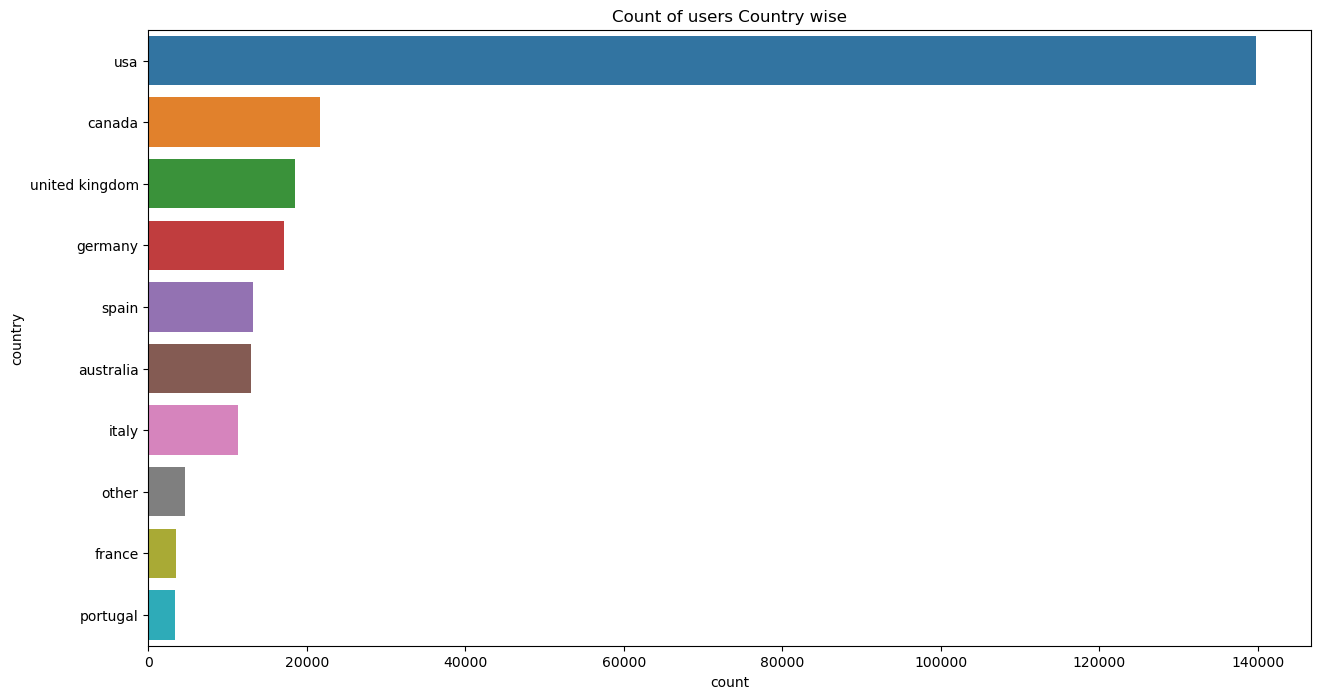

In [29]:
plt.figure(figsize=(15, 8))
sns.countplot(y='country',
              data=users,
              order=pd.value_counts(users['country']).iloc[:10].index)
plt.title('Count of users Country wise')

**Most number of users are from USA**
***Let's treat outliers in users age***

Text(0.5, 1.0, 'Age Distribution Plot')

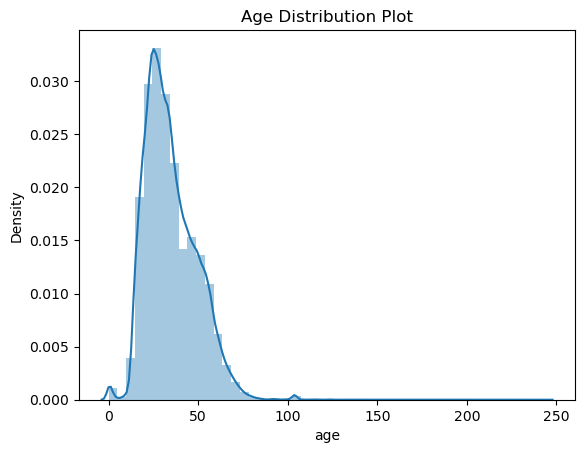

In [30]:
sns.distplot(users['age'])
plt.title('Age Distribution Plot')

***Age value's below 5 and above 80 do not make much sense for our book rating case...hence replacing these by NaNs***

In [31]:
# outlier data became NaN
users.loc[(users.age > 80) | (users.age < 5), 'age'] = np.nan

In [32]:
users.isna().sum()

user_id         0
age        112230
country         0
dtype: int64

***Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan***

In [33]:
users['age'] = users['age'].fillna(users.groupby('country')['age'].transform('median'))

In [34]:
users.isna().sum()

user_id      0
age        277
country      0
dtype: int64

***Still we have 277 Nan values let's fill them with mean***

In [35]:
users['age'].fillna(users.age.mean(),inplace=True)

In [36]:
users.isna().sum()

user_id    0
age        0
country    0
dtype: int64

### Books_Dataset

In [37]:
books.head(2)

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


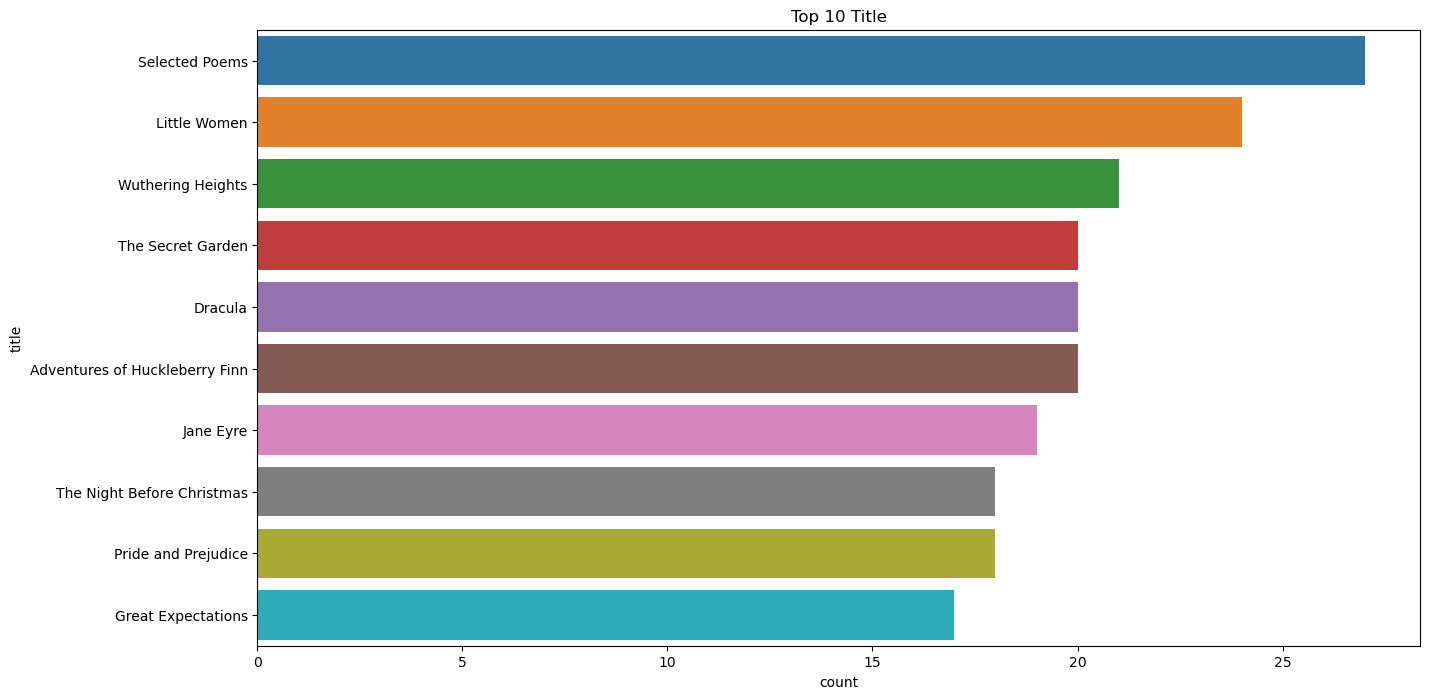

In [38]:
# Top 10 Title which have written the most books

plt.figure(figsize=(15, 8))
sns.countplot(data=books,
              y='title',
              order=pd.value_counts(books['title']).iloc[:10].index)
plt.title('Top 10 Title')
plt.show()

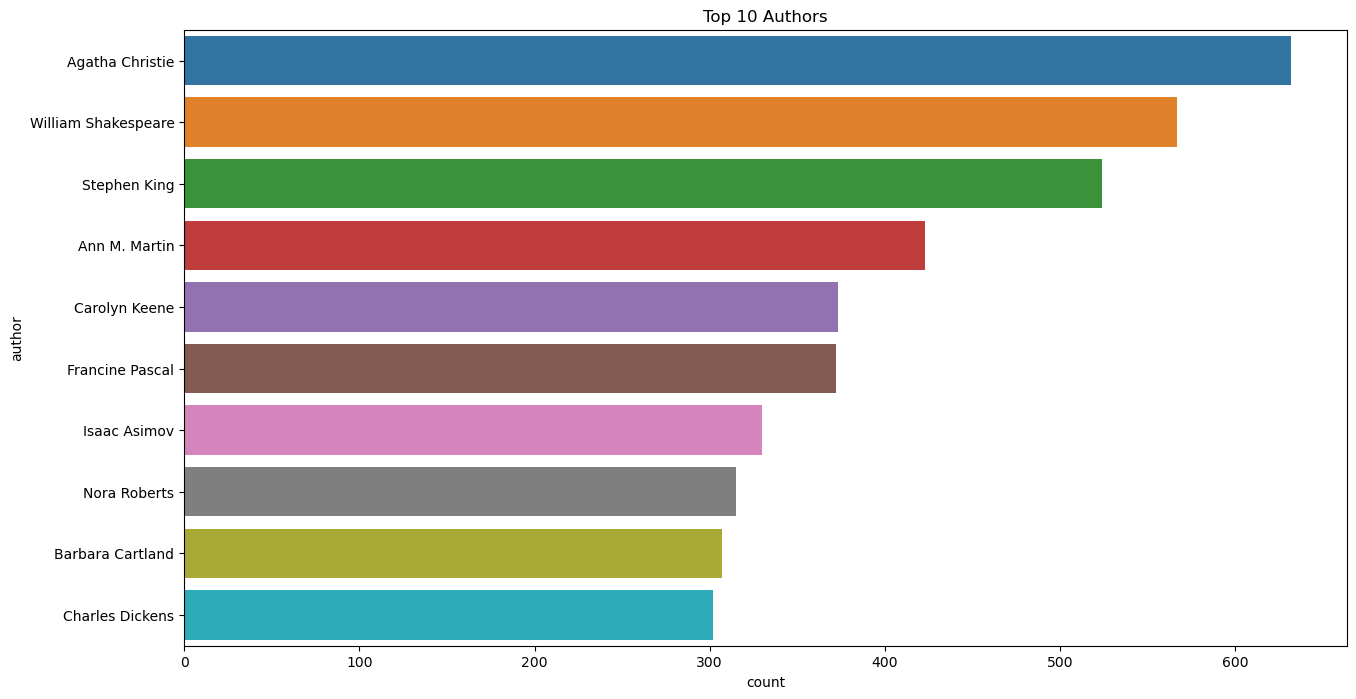

In [39]:
# Top 10 Authors which have written the most books

plt.figure(figsize=(15, 8))
sns.countplot(data=books,
              y='author',
              order=pd.value_counts(books['author']).iloc[:10].index)
plt.title('Top 10 Authors')
plt.show()

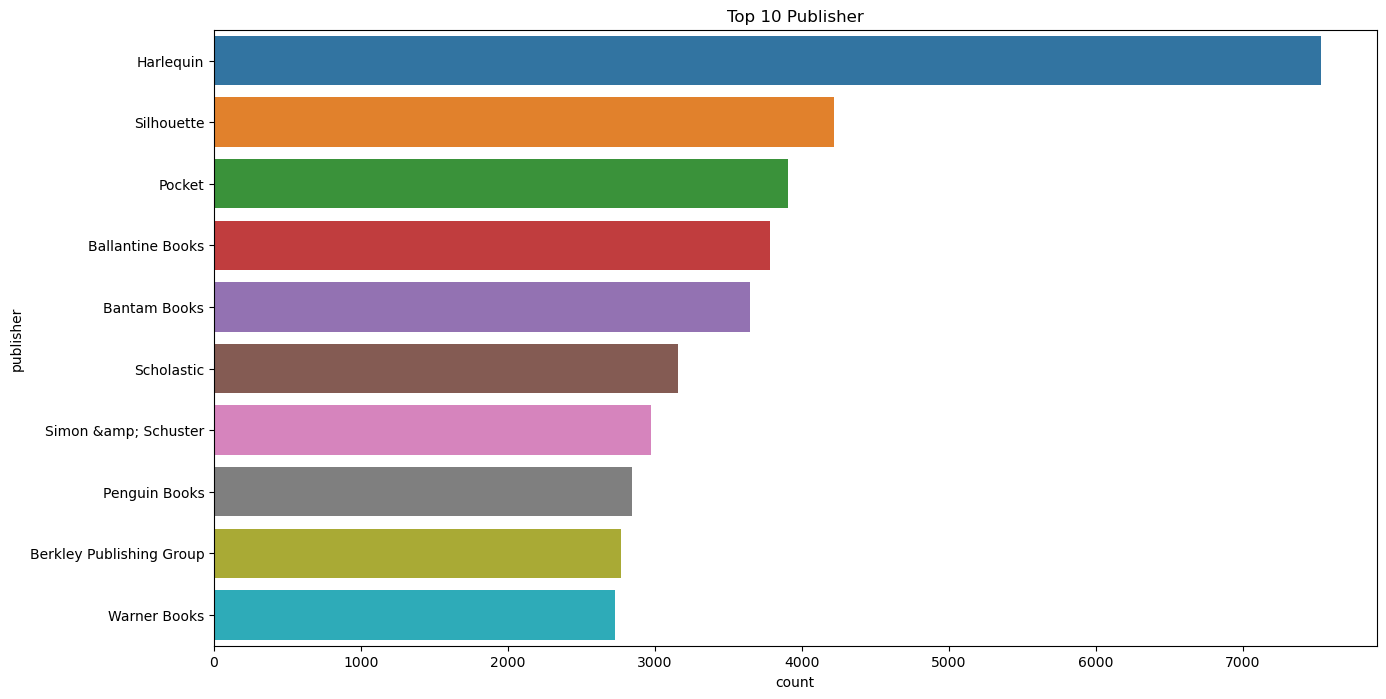

In [40]:
# Top 10 Publisher which have published the most books

plt.figure(figsize=(15, 8))
sns.countplot(data=books,
              y='publisher',
              order=pd.value_counts(books['publisher']).iloc[:10].index)
plt.title('Top 10 Publisher')
plt.show()

In [41]:
books['year']=books['year'].astype('str')
a=list(books['year'].unique())

a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [42]:
    #investigating the rows having 'DK Publishing Inc' as yearOfPublication
    books.loc[books['year'] == 'DK Publishing Inc',:]

,ISBN,title,author,year,publisher,img_url
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,NaN


***As it can be seen from above that there are some incorrect entries in Year field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file***

In [43]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','year'] = 2000
books.loc[books.ISBN == '0789466953','author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','year'] = 2000
books.loc[books.ISBN == '078946697X','author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,title,author,year,publisher,img_url
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,NaN


In [44]:
#investigating the rows having 'Gallimard' as yearOfPublication
books.loc[books['year'] == 'Gallimard',:]

,ISBN,title,author,year,publisher,img_url
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,NaN


In [45]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','year'] = 2003
books.loc[books.ISBN == '2070426769','author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,title,author,year,publisher,img_url
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,NaN


In [46]:
books['year']=pd.to_numeric(books['year'], errors='coerce')

print(sorted(books['year'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


***The value 0 for Year is invalid  We have assumed that the years after 2021 to be invalid and setting invalid years as NaN***

In [47]:
books.loc[(books['year'] > 2021) | (books['year'] == 0),'year'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['year'].fillna(round(books['year'].median()), inplace=True)

In [48]:
books.isna().sum()

ISBN         0
title        0
author       1
year         0
publisher    2
img_url      3
dtype: int64

In [49]:
#exploring 'publisher' column
books.loc[books.publisher.isnull(),:]
#two NaNs

,ISBN,title,author,year,publisher,img_url
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...


In [50]:
#Filling Nan of Publisher with others
books.publisher.fillna('Novelbooks Inc',inplace=True)

In [51]:
#exploring 'Book-Author' column
books.loc[books['author'].isnull(),:]

,ISBN,title,author,year,publisher,img_url
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...


In [52]:
#Filling Nan of author with author's name
books['author'].fillna('Larissa Anne',inplace=True)

In [53]:
books.isna().sum()

ISBN         0
title        0
author       0
year         0
publisher    0
img_url      3
dtype: int64

### Ratings_Dataset

In [54]:
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


**Ratings dataset should have books only which exist in our books dataset**

In [55]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

**It can be seen that many rows having book ISBN not part of books dataset got dropped off**

**Ratings dataset should have ratings from users which exist in users dataset.**

In [56]:
print("Shape of dataset before dropping",ratings_new.shape)

ratings_new = ratings_new[ratings_new['user_id'].isin(users['user_id'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


**It can be seen that no new user was there in ratings dataset.**

In [57]:
ratings_new.isna().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

Text(0, 0.5, 'Count')

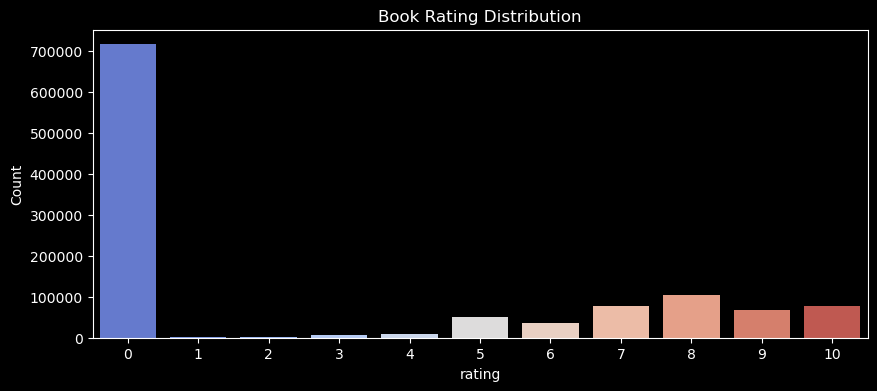

In [58]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 4))
sns.countplot(data=ratings, x='rating',palette='coolwarm')
plt.title('Book Rating Distribution')
plt.ylabel('Count')

**Most of the Rating are '0'**

***The ratings are very unevenly distributed.As quoted in the description of the dataset -Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets***

In [59]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['rating'] != 0]
ratings_implicit = ratings_new[ratings_new['rating'] == 0]

In [60]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


Text(0, 0.5, 'Count')

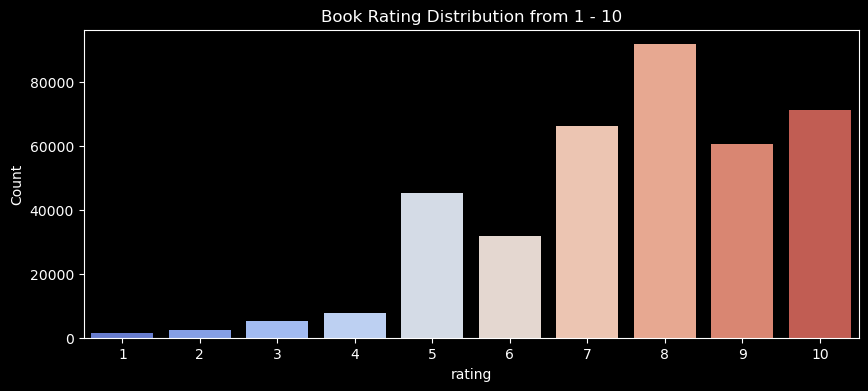

In [61]:
plt.figure(figsize=(10, 4))
sns.countplot(data=ratings_explicit , x='rating', palette='coolwarm')
plt.title('Book Rating Distribution from 1 - 10')
plt.ylabel('Count')

**It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times**



In [62]:
# Let's find the top 5 books which are rated by most number of users.
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['rating'].count())
rating_count.sort_values('rating', ascending=False).head()

,rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


In [63]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,title,author,year,publisher,img_url
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...


***The book that received the most rating counts in this data set is Rich Shapero’s “Wild Animus”. And there is something in common among these five books that received the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.***

In [64]:
# Create column Rating average
ratings_explicit['Avg_Rating'] = ratings_explicit.groupby('ISBN')['rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated'] = ratings_explicit.groupby(
    'ISBN')['rating'].transform('count')

In [65]:
ratings_explicit.head()

,user_id,ISBN,rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


In [66]:
ratings_explicit['user_id'].value_counts()

11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
          ... 
114767       1
114771       1
114772       1
114777       1
276721       1
Name: user_id, Length: 68091, dtype: int64

In [67]:
ratings_explicit['user_id'].unique().shape

(68091,)

In [68]:
x  = ratings_explicit['user_id'].value_counts() > 50

In [69]:
x[x].shape

(1150,)

In [70]:
x[x].index

Int64Index([ 11676,  98391, 189835, 153662,  23902, 235105,  76499, 171118,
             16795, 248718,
            ...
             20172, 116758, 213523, 159834, 159732,   6073, 177690, 239626,
              7915, 273979],
           dtype='int64', length=1150)

In [71]:
y = x[x].index

In [72]:
ratings_explicit['user_id'].shape

(383842,)

In [73]:
ratings_explicit = ratings_explicit[ratings_explicit['user_id'].isin(y)]

In [74]:
ratings_explicit.head(2)

,user_id,ISBN,rating,Avg_Rating,Total_No_Of_Users_Rated
1456,277427,002542730X,10,7.805195,77
1458,277427,003008685X,8,8.000000,1


In [75]:
ratings_explicit.shape

(151924, 5)

In [76]:
ratings_explicit

,user_id,ISBN,rating,Avg_Rating,Total_No_Of_Users_Rated
1456,277427,002542730X,10,7.805195,77
1458,277427,003008685X,8,8.000000,1
1461,277427,0060006641,10,9.000000,4
1465,277427,0060542128,7,7.357143,14
1474,277427,0061009059,9,7.940299,134
...,...,...,...,...,...
1149627,276680,1573222038,10,8.545455,11
1149629,276680,1573229083,7,7.555556,18
1149634,276680,1888173408,7,7.000000,4
1149635,276680,1888173564,8,8.333333,3


## Merging All Dataset

In [77]:
users.columns

Index(['user_id', 'age', 'country'], dtype='object')

In [78]:
ratings_explicit.columns

Index(['user_id', 'ISBN', 'rating', 'Avg_Rating', 'Total_No_Of_Users_Rated'], dtype='object')

In [79]:
books.columns

Index(['ISBN', 'title', 'author', 'year', 'publisher', 'img_url'], dtype='object')

In [80]:
final_dataset = users.copy()
final_dataset = pd.merge(final_dataset, ratings_explicit, on='user_id')
final_dataset = pd.merge(final_dataset, books, on='ISBN')

In [81]:
final_dataset.head(2)

,user_id,age,country,ISBN,rating,Avg_Rating,Total_No_Of_Users_Rated,title,author,year,publisher,img_url
0,254,24.0,usa,0060502320,7,7.5,2,"I've Got You, Babe",Karen Kendall,2002.0,Avon,http://images.amazon.com/images/P/0060502320.0...
1,98391,52.0,usa,0060502320,8,7.5,2,"I've Got You, Babe",Karen Kendall,2002.0,Avon,http://images.amazon.com/images/P/0060502320.0...


In [82]:
final_dataset.shape

(151924, 12)

In [83]:
final_dataset.sample(10)

,user_id,age,country,ISBN,rating,Avg_Rating,Total_No_Of_Users_Rated,title,author,year,publisher,img_url
150092,264525,17.0,philippines,0671707612,10,8.800000,5,ANNE FRANK: DIARY OF A YOUNG GIRL,Anne Frank,1990.0,Pocket,http://images.amazon.com/images/P/0671707612.0...
1526,223501,36.0,usa,0060730552,9,9.000000,5,Touching the Void: The True Story of One Man's...,Joe Simpson,2004.0,Perennial Currents,http://images.amazon.com/images/P/0060730552.0...
122524,156467,38.0,usa,0671729217,10,10.000000,1,JESSE'S RENEGADE,Nancy Bush,1991.0,Pocket,http://images.amazon.com/images/P/0671729217.0...
70723,173679,27.0,germany,037540290X,7,6.500000,2,A Widow for One Year,John Irving,1998.0,Random House Audio,http://images.amazon.com/images/P/037540290X.0...
86252,76499,36.0,usa,0394751728,10,10.000000,1,War Without Mercy: Race and Power in the Pacif...,John W. Dower,1987.0,Pantheon Books,http://images.amazon.com/images/P/0394751728.0...
18109,20060,48.0,usa,1551665204,7,8.000000,8,Baby Farm,Karen Harper,1999.0,Mira,http://images.amazon.com/images/P/1551665204.0...
91299,86641,39.0,usa,0812549899,7,7.000000,1,Starfire,Paul Preuss,1989.0,Tor Books,http://images.amazon.com/images/P/0812549899.0...
40164,11676,28.0,nan,1573245038,7,7.333333,3,The Little Book of Letting Go: A Revolutionary...,Hugh Prather,2000.0,Conari Press,http://images.amazon.com/images/P/1573245038.0...
54682,25409,31.0,usa,0425169456,7,5.333333,3,The Rich Man's Table,Scott Spencer,1999.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425169456.0...
113905,245410,28.0,usa,0911104216,8,7.500000,2,Richard Hittleman's Yoga: 28 Day Exercise Plan,Richard L. Hittleman,1972.0,Workman Publishing,http://images.amazon.com/images/P/0911104216.0...


In [84]:
final_dataset.isna().sum()

user_id                    0
age                        0
country                    0
ISBN                       0
rating                     0
Avg_Rating                 0
Total_No_Of_Users_Rated    0
title                      0
author                     0
year                       0
publisher                  0
img_url                    0
dtype: int64

In [85]:
final_dataset.shape

(151924, 12)

# Popularity Based Recommendation System

#### Popular Books

In [86]:
'''
Book weighted avg formula:

Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]

where,
v is the number of votes for the books;
m is the minimum votes required to be listed in the chart;
R is the average rating of the book; and
C is the mean vote across the whole report.
'''

'\nBook weighted avg formula:\n\nWeighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]\n\nwhere,\nv is the number of votes for the books;\nm is the minimum votes required to be listed in the chart;\nR is the average rating of the book; and\nC is the mean vote across the whole report.\n'

In [87]:
# Now we find the values of v,m,R,C

C= final_dataset['Avg_Rating'].mean()
m= final_dataset['Total_No_Of_Users_Rated'].quantile(0.90)
popular_book = final_dataset.loc[final_dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
popular_book.shape

C=7.732348996730877 , m=43.0


(15202, 12)

***Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.
We see that there are 48990 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:***

In [88]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)


popular_book['Score'] = popular_book.apply(weighted_rating,axis=1)
 

#Sorting books based on score calculated above
popular_book = popular_book.sort_values('Score', ascending=False)

In [89]:
#Keeping only one entry of each book
popular_book = popular_book.sort_values(
    'Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm = sns.light_palette('navy', as_cmap=True)
#Sorting books based on score calculated above
popular_book = popular_book.sort_values('Score', ascending=False)

#Printing the top 20 books
popular_book[[
    'title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score'
]].reset_index(drop=True).style.background_gradient(cmap=cm)

,title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.897172
1,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.809201
2,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.804092
3,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.793514
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.752790
5,To Kill a Mockingbird,214,8.943925,8.741210
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.730929
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.651179
8,"The Two Towers (The Lord of the Rings, Part 2)",83,9.120482,8.646754
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.618290


In [90]:
books.columns

Index(['ISBN', 'title', 'author', 'year', 'publisher', 'img_url'], dtype='object')

In [91]:
b = books[['title', 'img_url']].copy()
b.head(2)

,title,img_url
0,Classical Mythology,http://images.amazon.com/images/P/0195153448.0...
1,Clara Callan,http://images.amazon.com/images/P/0002005018.0...


In [92]:
popular_book.shape

(648, 13)

In [93]:
popular_book.columns

Index(['user_id', 'age', 'country', 'ISBN', 'rating', 'Avg_Rating',
       'Total_No_Of_Users_Rated', 'title', 'author', 'year', 'publisher',
       'img_url', 'Score'],
      dtype='object')

In [94]:
p = popular_book[['title', 'Total_No_Of_Users_Rated', 'Score']]
p

,title,Total_No_Of_Users_Rated,Score
453,Harry Potter and the Goblet of Fire (Book 4),137,8.897172
2700,Harry Potter and the Order of the Phoenix (Boo...,206,8.809201
61385,"The Return of the King (The Lord of the Rings,...",77,8.804092
2161,Harry Potter and the Sorcerer's Stone (Harry P...,313,8.793514
431,Harry Potter and the Prisoner of Azkaban (Book 3),133,8.752790
...,...,...,...
9628,How to Be Good,104,6.982932
21434,4 Blondes,52,6.594642
18746,Four Blondes,54,6.458670
3652,Isle of Dogs,71,6.241149


In [95]:
popular_book_img = p.merge(b, on='title')

In [96]:
popular_book_img.drop_duplicates(['title'], inplace=True)

In [97]:
popular_book_img

,title,Total_No_Of_Users_Rated,Score,img_url
0,Harry Potter and the Goblet of Fire (Book 4),137,8.897172,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Order of the Phoenix (Boo...,206,8.809201,http://images.amazon.com/images/P/043935806X.0...
8,"The Return of the King (The Lord of the Rings,...",77,8.804092,http://images.amazon.com/images/P/0345339738.0...
18,Harry Potter and the Sorcerer's Stone (Harry P...,313,8.793514,http://images.amazon.com/images/P/059035342X.0...
20,Harry Potter and the Prisoner of Azkaban (Book 3),133,8.752790,http://images.amazon.com/images/P/0439136350.0...
...,...,...,...,...
1974,Songs in Ordinary Time (Oprah's Book Club (Pap...,66,7.004505,http://images.amazon.com/images/P/0140244824.0...
1975,4 Blondes,52,6.594642,http://images.amazon.com/images/P/0451203895.0...
1976,Four Blondes,54,6.458670,http://images.amazon.com/images/P/080213825X.0...
1978,Isle of Dogs,71,6.241149,http://images.amazon.com/images/P/0425182908.0...


In [98]:
popular_book_img.shape

(593, 4)

In [99]:
popular_book_img.iloc[2][0]

'The Return of the King (The Lord of the Rings, Part 3)'

In [100]:
popular_book_img.iloc[2][1]

77

In [101]:
np.round(popular_book_img.iloc[2][2],2)

8.8

In [102]:
popular_book_img.iloc[2][3]

'http://images.amazon.com/images/P/0345339738.01.LZZZZZZZ.jpg'

In [103]:
popular_book_img.iloc[11][0]

"Ender's Game (Ender Wiggins Saga (Paperback))"

In [104]:
popular_book_img.iloc[11][1]

117

In [105]:
np.round(popular_book_img.iloc[11][2],2)

8.54

In [106]:
popular_book_img.iloc[11][3]

'http://images.amazon.com/images/P/0312853238.01.LZZZZZZZ.jpg'

#### More Number of Time's Rated on Book

In [107]:
cm = sns.light_palette('mediumorchid', as_cmap=True)

#Sorting books based on no.of rating given by users calculated above
no_of_times_rated_book = popular_book.sort_values('Total_No_Of_Users_Rated', ascending=False)

#Printing the most no.of rated book by users
no_of_times_rated_book[[
    'title', 'author', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score'
]].reset_index(drop=True).style.background_gradient(cmap=cm)

,title,author,Total_No_Of_Users_Rated,Avg_Rating,Score
0,The Lovely Bones: A Novel,Alice Sebold,707,8.185290,8.159321
1,Wild Animus,Rich Shapero,581,4.390706,4.620979
2,The Da Vinci Code,Dan Brown,487,8.435318,8.378285
3,The Red Tent (Bestselling Backlist),Anita Diamant,383,8.182768,8.137303
4,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,320,7.887500,7.869121
5,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,313,8.939297,8.793514
6,The Secret Life of Bees,Sue Monk Kidd,307,8.452769,8.364260
7,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,295,8.142373,8.090210
8,A Painted House,John Grisham,281,7.338078,7.390404
9,Girl with a Pearl Earring,Tracy Chevalier,278,7.982014,7.948570


In [108]:
books.columns

Index(['ISBN', 'title', 'author', 'year', 'publisher', 'img_url'], dtype='object')

In [109]:
b = books[['title', 'img_url']].copy()
b.head(2)

,title,img_url
0,Classical Mythology,http://images.amazon.com/images/P/0195153448.0...
1,Clara Callan,http://images.amazon.com/images/P/0002005018.0...


In [110]:
no_of_times_rated_book.shape

(648, 13)

In [111]:
no_of_times_rated_book.columns

Index(['user_id', 'age', 'country', 'ISBN', 'rating', 'Avg_Rating',
       'Total_No_Of_Users_Rated', 'title', 'author', 'year', 'publisher',
       'img_url', 'Score'],
      dtype='object')

In [112]:
n = no_of_times_rated_book[['title', 'Total_No_Of_Users_Rated', 'Score']]
n.head()

,title,Total_No_Of_Users_Rated,Score
849,The Lovely Bones: A Novel,707,8.159321
2297,Wild Animus,581,4.620979
1221,The Da Vinci Code,487,8.378285
9081,The Red Tent (Bestselling Backlist),383,8.137303
4682,Divine Secrets of the Ya-Ya Sisterhood: A Novel,320,7.869121


In [113]:
no_of_times_rated_book_img = p.merge(b, on='title')

In [114]:
no_of_times_rated_book_img.drop_duplicates(['title'], inplace=True)

In [115]:
no_of_times_rated_book_img = no_of_times_rated_book_img.sort_values('Total_No_Of_Users_Rated', ascending=False)

In [116]:
no_of_times_rated_book_img.head()

,title,Total_No_Of_Users_Rated,Score,img_url
273,The Lovely Bones: A Novel,707,8.159321,http://images.amazon.com/images/P/0316666343.0...
1984,Wild Animus,581,4.620979,http://images.amazon.com/images/P/0971880107.0...
126,The Da Vinci Code,487,8.378285,http://images.amazon.com/images/P/0385504209.0...
312,The Red Tent (Bestselling Backlist),383,8.137303,http://images.amazon.com/images/P/0312195516.0...
729,Divine Secrets of the Ya-Ya Sisterhood: A Novel,320,7.869121,http://images.amazon.com/images/P/0060928336.0...


In [117]:
no_of_times_rated_book_img.shape

(593, 4)

In [118]:
no_of_times_rated_book_img.iloc[0][0]

'The Lovely Bones: A Novel'

In [119]:
no_of_times_rated_book_img.iloc[0][1]

707

In [120]:
no_of_times_rated_book_img.iloc[0][2]

8.159321342479236

In [121]:
no_of_times_rated_book_img.iloc[0][3]

'http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg'

In [122]:
no_of_times_rated_book_img.iloc[8][0]

'Girl with a Pearl Earring'

In [123]:
no_of_times_rated_book_img.iloc[8][1]

278

In [124]:
no_of_times_rated_book_img.iloc[8][2]

7.948570114826877

In [125]:
no_of_times_rated_book_img.iloc[8][3]

'http://images.amazon.com/images/P/0452282152.01.LZZZZZZZ.jpg'

# Collaborative Filtering Based Recommendation System

In [126]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [127]:
ratings['user_id'].unique().shape

(105283,)

In [128]:
x  = ratings['user_id'].value_counts() > 200

In [129]:
x[x].shape

(899,)

In [130]:
y = x[x].index

In [131]:
ratings['user_id'].shape

(1149780,)

In [132]:
ratings = ratings[ratings['user_id'].isin(y)]

In [133]:
ratings.head(2)

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0


In [134]:
ratings.shape

(526356, 3)

In [135]:
ratings

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


In [136]:
ratings_with_books = ratings.merge(books, on='ISBN')

In [137]:
ratings_with_books.head(2)

,user_id,ISBN,rating,title,author,year,publisher,img_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [138]:
ratings_with_books.shape

(487671, 8)

In [139]:
num_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()
num_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [140]:
num_rating.rename(columns={'rating': 'num_of_rating'}, inplace=True)

In [141]:
num_rating.head(2)

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1


In [142]:
final_ratings = ratings_with_books.merge(num_rating, on='title')

In [143]:
final_ratings.head(1)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [144]:
final_ratings.shape

(487671, 9)

In [145]:
final_ratings = final_ratings[final_ratings['num_of_rating']>=50]

In [146]:
final_ratings.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [147]:
final_ratings.sample(5)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
76850,244736,0743418174,0,Good in Bed,Jennifer Weiner,2002.0,Washington Square Press,http://images.amazon.com/images/P/0743418174.0...,174
9095,127200,0451153553,0,Misery,Stephen King,1988.0,New Amer Library,http://images.amazon.com/images/P/0451153553.0...,121
5703,264317,0425154092,0,From Potter's Field,Patricia Daniels Cornwell,1996.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425154092.0...,94
141967,196077,0345413873,5,Monster : A Novel (Alex Delaware Novels (Paper...,JONATHAN KELLERMAN,2000.0,Ballantine Books,http://images.amazon.com/images/P/0345413873.0...,51
29684,177432,0380002930,8,Watership Down,Richard Adams,1976.0,Avon,http://images.amazon.com/images/P/0380002930.0...,115


In [148]:
final_ratings.isna().sum()

user_id          0
ISBN             0
rating           0
title            0
author           0
year             0
publisher        0
img_url          0
num_of_rating    0
dtype: int64

In [149]:
final_ratings.drop_duplicates(['user_id', 'title'], inplace=True)

In [150]:
final_ratings.shape

(59850, 9)

In [151]:
final_ratings.head()

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [152]:
final_ratings['avg_rating']=final_ratings.groupby('ISBN')['rating'].transform('mean')
final_ratings['total_no_of_users_rated']=final_ratings.groupby('ISBN')['rating'].transform('count')

In [153]:
final_ratings.sample(5)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating,avg_rating,total_no_of_users_rated
89902,227447,038550926X,0,The Devil Wears Prada : A Novel,LAUREN WEISBERGER,2003.0,Doubleday,http://images.amazon.com/images/P/038550926X.0...,75,2.000000,56
57703,106225,0804106304,0,The Joy Luck Club,Amy Tan,1994.0,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,181,1.848837,172
9876,88733,0553268880,0,The Prince of Tides,Pat Conroy,1987.0,Bantam Books,http://images.amazon.com/images/P/0553268880.0...,148,1.679104,134
92864,35859,0553574663,0,The Grilling Season,Diane Mott Davidson,1998.0,Bantam Books,http://images.amazon.com/images/P/0553574663.0...,50,1.930233,43
69344,31315,0804115613,0,Fried Green Tomatoes at the Whistle Stop Cafe,Fannie Flagg,2000.0,Ballantine Books,http://images.amazon.com/images/P/0804115613.0...,131,1.083333,24


In [154]:
books_pivot = final_ratings.pivot_table(columns='user_id',
                                        index='title',
                                        values='rating')

In [155]:
books_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [156]:
books_pivot.shape

(742, 888)

In [157]:
books_pivot.fillna(0, inplace=True)

In [158]:
books_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
# Compressed Sparse Row matrix
from scipy.sparse import csr_matrix

In [160]:
books_sparse = csr_matrix(books_pivot)

In [161]:
books_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14942 stored elements in Compressed Sparse Row format>

In [162]:
from sklearn.neighbors import NearestNeighbors

In [163]:
model = NearestNeighbors(algorithm='brute')

In [164]:
model.fit(books_sparse)

NearestNeighbors(algorithm='brute')

In [165]:
distance, suggestion = model.kneighbors(books_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6)

In [166]:
distance

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [167]:
suggestion

array([[237, 240, 238, 241, 184, 536]], dtype=int64)

In [168]:
for i in range(len(suggestion)):
    print(books_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [169]:
books_pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)

In [170]:
book_name = books_pivot.index

In [171]:
def recommendation_book(book_name):
    book_id = np.where(books_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(books_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=11)# recommending 10 books
    
    for i in range(len(suggestion)):
        books = books_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [172]:
# testing our recomendation based on selected book
book = 'Harry Potter and the Chamber of Secrets (Book 2)'
recommendation_book(book)

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Exclusive
The Cradle Will Fall
Jacob Have I Loved
The Witness
Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))
Toxin
The Long Road Home


# All Authors Books

In [173]:
books.author.value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: author, Length: 102022, dtype: int64

Text(0.5, 1.0, 'Number Of books Written by Authors')

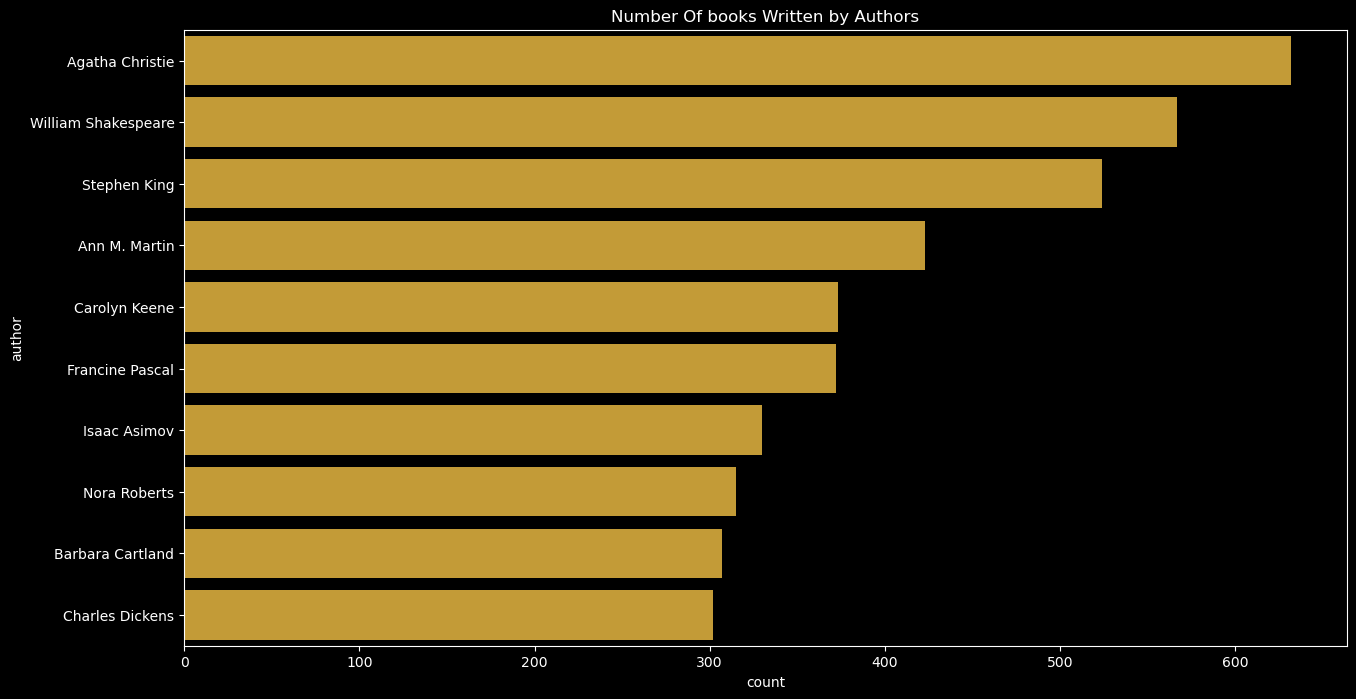

In [174]:
plt.figure(figsize=(15,8))
sns.countplot(data = books, y = 'author', order = pd.value_counts(books['author']).iloc[:10].index, color='goldenrod')
plt.title('Number Of books Written by Authors')

In [175]:
authors = pd.DataFrame(pd.value_counts(books['author']))
authors_name = authors.index
authors_name

Index(['Agatha Christie', 'William Shakespeare', 'Stephen King',
       'Ann M. Martin', 'Carolyn Keene', 'Francine Pascal', 'Isaac Asimov',
       'Nora Roberts', 'Barbara Cartland', 'Charles Dickens',
       ...
       'Susan J. Harrison', 'Publishing Company Western', 'George Hendrick',
       'Linda Jackson', 'Jim Durk', 'R. Gelman', 'Ellery R. Sheets',
       'Artiste C. Arthur', 'Emily Pearl Kingsley', 'Christopher  Biffle'],
      dtype='object', length=102022)

In [176]:
'''
# Create column Rating average
ratings_explicit['Avg_Rating'] = ratings_explicit.groupby('ISBN')['rating'].transform('mean')

'''

"\n# Create column Rating average\nratings_explicit['Avg_Rating'] = ratings_explicit.groupby('ISBN')['rating'].transform('mean')\n\n"

In [177]:
books.columns

Index(['ISBN', 'title', 'author', 'year', 'publisher', 'img_url'], dtype='object')

In [178]:
ratings.columns

Index(['user_id', 'ISBN', 'rating'], dtype='object')

In [179]:
books.shape

(271360, 6)

In [180]:
ratings.shape

(526356, 3)

In [181]:
books_with_ratings = books.merge(ratings,on='ISBN')

In [182]:
books_with_ratings.shape

(487671, 8)

In [183]:
books_with_ratings.sample(3)

,ISBN,title,author,year,publisher,img_url,user_id,rating
146648,0425164101,Crime Through Time II,Miriam Grace Monfredo,1998.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425164101.0...,153662,0
185578,0385316348,The Ranch,Danielle Steel,1997.0,Dell,http://images.amazon.com/images/P/0385316348.0...,184299,0
118878,0375411070,Basket Case,CARL HIAASEN,2002.0,Knopf,http://images.amazon.com/images/P/0375411070.0...,241980,0


In [184]:
books_with_ratings['Avg_Rating'] = books_with_ratings.groupby('ISBN')['rating'].transform('mean')
books_with_ratings.head()

,ISBN,title,author,year,publisher,img_url,user_id,rating,Avg_Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8,2.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,85526,0,2.000000
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,96054,0,2.000000
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,177458,0,2.000000
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,110912,10,6.333333


In [185]:
books_with_ratings.shape

(487671, 9)

In [186]:
books_with_ratings.drop_duplicates(['title', 'author'], inplace=True, ignore_index=True)

In [187]:
books_with_ratings.shape

(166046, 9)

In [188]:
books_with_ratings.head()

,ISBN,title,author,year,publisher,img_url,user_id,rating,Avg_Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8,2.000000
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,110912,10,6.333333
2,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,11676,9,4.400000
3,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,52614,8,8.000000
4,0671870432,PLEADING GUILTY,Scott Turow,1993.0,Audioworks,http://images.amazon.com/images/P/0671870432.0...,11676,8,8.000000


In [189]:
pd.value_counts(books['author'])

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: author, Length: 102022, dtype: int64

In [190]:
books_with_ratings.author.value_counts()

Agatha Christie        377
Ann M. Martin          370
William Shakespeare    336
Francine Pascal        319
Barbara Cartland       297
                      ... 
Miles Corwin             1
Jane M. Dieckmann        1
Martin Balarezo          1
Kenneth M. Morris        1
David Biggs              1
Name: author, Length: 67163, dtype: int64

In [191]:
authors_name = books_with_ratings['author']

In [192]:
def get_books_author(author_name):
    a = books_with_ratings[books_with_ratings['author']==author_name][['title', 'Avg_Rating', 'img_url']]
    a = a.sort_values(by='Avg_Rating',ascending=False)
    return a

In [193]:
get_books_author('David Biggs')

,title,Avg_Rating,img_url
166045,Cocktail Classics,7.0,http://images.amazon.com/images/P/1845170423.0...


# Books on Age

In [194]:
users.head(2)

,user_id,age,country
0,1,36.0,usa
1,2,18.0,usa


In [195]:
from sklearn.preprocessing import StandardScaler

from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [196]:
sc = StandardScaler()

In [197]:
x = users.age.values.reshape(-1, 1)
x

array([[36.],
       [18.],
       [23.],
       ...,
       [33.],
       [36.],
       [31.]])

In [198]:
x = sc.fit_transform(x)
x

array([[ 0.16067384],
       [-1.53059075],
       [-1.06079503],
       ...,
       [-0.12120359],
       [ 0.16067384],
       [-0.30912188]])

In [199]:
km = KMeans()

In [200]:
cluster = km.fit_predict(x)
cluster

array([7, 6, 2, ..., 0, 7, 0])

In [201]:
wcss = []

for i in range(1, 21):
    km = KMeans(n_clusters=i)
    cluster = km.fit_predict(x)
    wcss.append(km.inertia_)

wcss

[278858.0000000959,
 111822.66732995104,
 46569.48435904083,
 31007.486814357835,
 19637.300231894493,
 14282.296967011911,
 9645.699613573954,
 7835.6674419698475,
 6076.563917664246,
 5113.717403245239,
 4070.6830963538614,
 3450.8571254716176,
 2872.423359119315,
 2450.8910440029413,
 2148.840615911098,
 2003.888943245247,
 1686.7082421636574,
 1544.7993770047028,
 1416.5319350986965,
 1257.7099108809034]

Text(0, 0.5, 'WCSS')

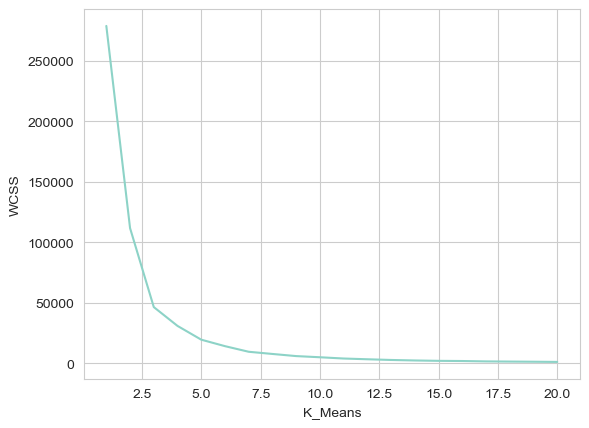

In [202]:
sns.set_style('whitegrid')
plt.plot(range(1,21),wcss)
plt.xlabel('K_Means')
plt.ylabel('WCSS')

In [203]:
km = KMeans(n_clusters=5)
ylabel = km.fit_predict(x)
ylabel

array([2, 4, 4, ..., 2, 2, 0])

In [204]:
km.cluster_centers_

array([[-0.48075692],
       [ 2.45603102],
       [ 0.14372131],
       [ 1.20990934],
       [-1.35379818]])

In [205]:
users['Cluster'] = ylabel

In [206]:
users.head()

,user_id,age,country,Cluster
0,1,36.0,usa,2
1,2,18.0,usa,4
2,3,23.0,russia,4
3,4,17.0,portugal,4
4,5,32.0,united kingdom,0


In [207]:
users.Cluster.value_counts()

2    111247
0     73603
4     45904
3     29374
1     18730
Name: Cluster, dtype: int64

In [208]:
'''
cluster NO   Min     Max
   2        -5.0    -24.5
   3        -25.0   -32.5
   0        -33.0   -42.0
   1        -43.0   -55.0
   4        -56.0   -80.0
   
'''

'\ncluster NO   Min     Max\n   2        -5.0    -24.5\n   3        -25.0   -32.5\n   0        -33.0   -42.0\n   1        -43.0   -55.0\n   4        -56.0   -80.0\n   \n'

In [209]:
users.columns

Index(['user_id', 'age', 'country', 'Cluster'], dtype='object')

In [210]:
ratings.columns

Index(['user_id', 'ISBN', 'rating'], dtype='object')

In [211]:
books.columns

Index(['ISBN', 'title', 'author', 'year', 'publisher', 'img_url'], dtype='object')

In [212]:
age_with_books = users.merge(ratings, on='user_id')
age_with_books = age_with_books.merge(books, on='ISBN')
age_with_books['Avg_Rating'] = age_with_books.groupby('ISBN')['rating'].transform('mean')
age_with_books = age_with_books.drop_duplicates(['title', 'author'])
age_with_books.sample(4)

,user_id,age,country,Cluster,ISBN,rating,title,author,year,publisher,img_url,Avg_Rating
321136,63714,29.0,united kingdom,0,1902328167,9,On the Trail of Dinosaurs the Latest Evi,Michael Benton,1996.0,Quantum Books Ltd,http://images.amazon.com/images/P/1902328167.0...,9.0
358179,93363,30.0,usa,0,1586606972,8,Retrovirus,T. L. Higley,2002.0,Promise Press,http://images.amazon.com/images/P/1586606972.0...,8.0
204449,19085,60.0,usa,1,0451150511,7,"Renegade Rebellion (Trailsman, No 71)",Jon Sharpe,1987.0,New American Library,http://images.amazon.com/images/P/0451150511.0...,7.0
165628,11676,28.0,nan,0,3035000085,9,Das groÃ?Â?e Lehrbuch erfolgreicher Kommunikat...,Edith Prescott,2001.0,Oesch Verlag,http://images.amazon.com/images/P/3035000085.0...,8.5


In [213]:
age_with_books.country.sort_values().unique()

array(['australia', 'belgium', 'brazil', 'canada', 'china', 'denmark',
       'dominican republic', 'finland', 'france', 'germany', 'iran',
       'italy', 'japan', 'malaysia', 'nan', 'netherlands', 'new zealand',
       'other', 'portugal', 'qatar', 'romania', 'spain', 'sweden',
       'switzerland', 'united kingdom', 'usa'], dtype=object)

In [214]:
def get_books_by_age(age):
    if age < 25:
        a = age_with_books[age_with_books.Cluster == 2]
        a = a.sort_values(by='Avg_Rating',ascending=False)
        return a[['title', 'author', 'Avg_Rating']]
    
    elif ((age >= 25) & (age <33)):
        a = age_with_books[age_with_books.Cluster == 3]
        a = a.sort_values(by='Avg_Rating',ascending=False)
        return a[['title', 'author', 'Avg_Rating']]
    
    elif ((age >= 33) & (age <43)):
        a = age_with_books[age_with_books.Cluster == 0]
        a = a.sort_values(by='Avg_Rating',ascending=False)
        return a[['title', 'author', 'Avg_Rating']]
    
    elif ((age >= 43) & (age <56)):
        a = age_with_books[age_with_books.Cluster == 1]
        a = a.sort_values(by='Avg_Rating',ascending=False)
        return a[['title', 'author', 'Avg_Rating']]
    
    else:
        a = age_with_books[age_with_books.Cluster == 4]
        a = a.sort_values(by='Avg_Rating',ascending=False)
        return a[['title', 'author', 'Avg_Rating']]

In [215]:
get_books_by_age(3).head(2)

,title,author,Avg_Rating
450455,The Mennonites,Larry Towell,10.0
337806,The Ultimate Terrorists,Jessica Stern,10.0


In [216]:
get_books_by_age(28).head(2)

,title,author,Avg_Rating
279384,Gourmet's Casual Entertaining: Easy Year-Round...,Gourmet Magazine,10.0
408157,How to Share Your Faith,Greg Laurie,10.0


In [217]:
get_books_by_age(40).head(2)

,title,author,Avg_Rating
425616,"Reading Reminders : Tools, Tips, and Techniques",Jim Burke,10.0
160957,Home Freezing of Fruits and Vegetables,U S Department of Agriculture,10.0


In [218]:
get_books_by_age(50).head(2)

,title,author,Avg_Rating
454544,The crystal bucket: Television criticism from ...,Clive James,10.0
311679,Indycar (Osprey Motor Sport),Kris Perkins,10.0


In [219]:
get_books_by_age(58).head(2)

,title,author,Avg_Rating
473311,The Selected Works of Djuna Barnes,Djuna Barnes,10.0
477846,The Little Giant Encyclopedia of The Zodiac,The Diagram Group,10.0


## Country

In [220]:
age_with_books.head(2)

,user_id,age,country,Cluster,ISBN,rating,title,author,year,publisher,img_url,Avg_Rating
0,254,24.0,usa,4,006000438X,0,The Death of Vishnu: A Novel,Manil Suri,2002.0,Perennial,http://images.amazon.com/images/P/006000438X.0...,2.913043
23,254,24.0,usa,4,0060013117,0,Night Watch,Terry Pratchett,2002.0,HarperCollins,http://images.amazon.com/images/P/0060013117.0...,2.400000


In [221]:
selected_country = 'usa'

In [222]:
def selected_country(selected_country = age_with_books.country.sort_values().unique()):
    books = age_with_books[age_with_books.country == selected_country]
    books = books.sort_values(by=['Avg_Rating'],ascending=False) 
    books[['title', 'country', 'Avg_Rating']]

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(book_name, open('book_name.pkl', 'wb'))
pickle.dump(final_ratings, open('final_ratings.pkl', 'wb'))
pickle.dump(books_pivot, open('books_pivot.pkl', 'wb'))
pickle.dump(popular_book_img, open('popular_book_img.pkl', 'wb'))
pickle.dump(no_of_times_rated_book_img, open('no_of_times_rated_book_img.pkl', 'wb'))
pickle.dump(books_with_ratings, open('books_with_ratings.pkl', 'wb'))
pickle.dump(age_with_books, open('age_with_books.pkl', 'wb'))
